# User Categorization Classifier 

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/dl/data' 

/content/drive/.shortcut-targets-by-id/1ZyNJXaTInYA2YPBLOAFnql__PhYO31aJ/data


In [ ]:
import numpy as np
import pandas as pd
import pickle as pkl
from tabulate import tabulate
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from datetime import datetime
from joblib import dump, load
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [ ]:
binary_columns = ['Opted out of email: Events and Community', 'Opted out of email: Program Announcements', 'Opted out of email: The Batch', 'Unsubscribed from all email', 'AI For Everyone', 'Deep Learning Specialization', 'Natural Language Processing Specialization', 'AI for Medicine Specialization', 'TensorFlow Developer Professional Certificate','TensorFlow: Data and Deployment Specialization']
numeric_columns = ['Number of Pageviews','Average Pageviews','Number of Sessions','Marketing emails opened', 'Marketing emails delivered','Marketing emails clicked', 'Total Education Effort','Longevity']
timestamp_columns = ['Became a Lead Date', 'Became a Subscriber Date', 'First Conversion Date', 'First marketing email click date', 'First marketing email open date', 'First marketing email send date', 'Last marketing email click date', 'Last marketing email open date', 'Last marketing email send date','Last Registered Event Date']
categorical_columns = ['First Page Seen Path', 'Last Page Seen Path', 'Last Registered Event','Last marketing email name','Highest level of completed education', 'Job Title or Function', 'IP Country', 'Associated Company ID']

In [ ]:
def Load_Dicts(pkl_filename):
  All_Dicts = pkl.load( open (pkl_filename, "rb"))
  Dict_Opt= All_Dicts[0]
  Events_Dict= All_Dicts[1]
  Education_Dict= All_Dicts[2]
  Jobs_Dict= All_Dicts[3]
  Countries_Dict = All_Dicts[4]
  Companies_Dict = All_Dicts[5]
  First_Pages_Dict = All_Dicts[6]
  Last_Pages_Dict = All_Dicts[7]
  Courses_Dict= All_Dicts[8]
  return Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict, Courses_Dict

def drop_crr(df,tol=0.8):
	crr = df_std.corr().abs()
	keep_columns = df.columns.to_list()
	keep_dict = {clm:True for clm in keep_columns}
	for i in range(0,len(keep_columns)-1):
		# Loop over all columns to the right of the current one
	    	for j in range(i+1,len(keep_columns)):
	    		# If the absolute correlation between the current two columns is greater than or equal to 0.8...
	    		if crr[keep_columns[i]].loc[keep_columns[j]] >= tol:
	    			# If we haven't already told the keep_columns list to drop column j...
	    			if keep_dict[keep_columns[j]] == True:
	    				# Drop column j
	    				keep_dict[keep_columns[j]] = False
	selected_columns = [clm for clm in keep_dict if keep_dict[clm] == True]
	return selected_columns

# Building a classifier to predict Group/Cluster category based on a limited set of features
# - Group1 → Class Label 0 (13,184 samples / 3.91%)
# - Group2 → Class Label 1 (86,499 samples / 25.67%)
# - Group 3 → Class Label 2 (237,272 samples / 70.42%)


In [ ]:
# Loading Students data set from a pickle file - All features are ready for analysis and selection!
df_group1 = pd.read_pickle("./converted_students_clustering_data_01282021.pkl")
df_group2 = pd.read_pickle("./converted_clustering_data_01282021.pkl")
df_group3 = pd.read_pickle("./group3_02052021.pkl")
Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict, Courses_Dict= Load_Dicts("./all_dictionaries.pkl")

In [ ]:
# Loading all dictionaries (categorical features) from a pickle file
Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict, Courses_Dict= Load_Dicts("./all_dictionaries.pkl")

In [ ]:
binary_columns = ['Opted out of email: Events and Community', 'Opted out of email: Program Announcements', 'Opted out of email: The Batch', 'Unsubscribed from all email', 'AI For Everyone', 'Deep Learning Specialization', 'Natural Language Processing Specialization', 'AI for Medicine Specialization', 'TensorFlow Developer Professional Certificate','TensorFlow: Data and Deployment Specialization']
numeric_columns = ['Number of Pageviews','Average Pageviews','Number of Sessions','Marketing emails opened', 'Marketing emails delivered','Marketing emails clicked', 'Total Education Effort','Longevity']
timestamp_columns = ['Became a Lead Date', 'Became a Subscriber Date', 'First Conversion Date', 'First marketing email click date', 'First marketing email open date', 'First marketing email send date', 'Last marketing email click date', 'Last marketing email open date', 'Last marketing email send date','Last Registered Event Date']
categorical_columns = ['First Page Seen Path', 'Last Page Seen Path', 'Last Registered Event','Last marketing email name','Highest level of completed education', 'Job Title or Function', 'IP Country', 'Associated Company ID']

In [ ]:
df_group1['Cluster'] = np.zeros((13184,1))

In [ ]:
df_group2['Cluster']= np.ones((86499,1))

In [ ]:
df_group1.columns

Index(['Last marketing email name', 'Average Pageviews', 'Number of Pageviews',
       'Marketing emails opened', 'Marketing emails clicked',
       'Opted out of email: Events and Community',
       'Opted out of email: Program Announcements',
       'Opted out of email: The Batch', 'Unsubscribed from all email',
       'Last Registered Event', 'Highest level of completed education',
       'Job Title or Function', 'IP Country', 'Associated Company ID',
       'First Page Seen Path', 'Last Page Seen Path', 'AI For Everyone',
       'Deep Learning Specialization',
       'Natural Language Processing Specialization',
       'AI for Medicine Specialization',
       'TensorFlow Developer Professional Certificate',
       'TensorFlow: Data and Deployment Specialization',
       'Total Education Effort', 'Cluster'],
      dtype='object')

In [ ]:
df_group2.columns

Index(['Last marketing email name', 'Average Pageviews', 'Number of Pageviews',
       'Marketing emails opened', 'Marketing emails clicked',
       'Opted out of email: Events and Community',
       'Opted out of email: Program Announcements',
       'Opted out of email: The Batch', 'Unsubscribed from all email',
       'Last Registered Event', 'Highest level of completed education',
       'Job Title or Function', 'IP Country', 'Associated Company ID',
       'First Page Seen Path', 'Last Page Seen Path', 'Cluster'],
      dtype='object')

In [ ]:
df_group3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237272 entries, 15 to 336954
Data columns (total 30 columns):
 #   Column                                                                      Non-Null Count   Dtype         
---  ------                                                                      --------------   -----         
 0   Contact ID                                                                  237272 non-null  int64         
 1   Became a Lead Date                                                          5 non-null       datetime64[ns]
 2   Became a Subscriber Date                                                    213673 non-null  datetime64[ns]
 3   First Conversion Date                                                       0 non-null       datetime64[ns]
 4   First marketing email click date                                            80670 non-null   datetime64[ns]
 5   First marketing email open date                                             209964 non-null 

In [ ]:
df_group3['Cluster']=2*np.ones((237272,1))

In [ ]:
df_group1=df_group1[df_group2.columns].copy()

In [ ]:
df_group3=df_group3[df_group2.columns].copy()

In [ ]:
frames = [df_group1, df_group2, df_group3]

In [ ]:
df_base = pd.concat(frames)

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336955 entries, 0 to 336954
Data columns (total 17 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Last marketing email name                  336955 non-null  int64  
 1   Average Pageviews                          336955 non-null  int64  
 2   Number of Pageviews                        336955 non-null  int64  
 3   Marketing emails opened                    336955 non-null  int64  
 4   Marketing emails clicked                   336955 non-null  int64  
 5   Opted out of email: Events and Community   336955 non-null  int64  
 6   Opted out of email: Program Announcements  336955 non-null  int64  
 7   Opted out of email: The Batch              336955 non-null  int64  
 8   Unsubscribed from all email                336955 non-null  int64  
 9   Last Registered Event                      336955 non-null  int64  
 10  Highest 

In [ ]:
y = df_base['Cluster'].values.astype(int)

In [ ]:
df_train = df_base.drop(columns=['Cluster']).copy()

In [ ]:
X_eval= df_train.values

## Feature ranking and selection

In [ ]:
#Use Random Forest to get feature ranks/importances for each feature
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,random_state=42)
forest.fit(X_eval, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


Feature ranking:
1. feature 1 - Last marketing email name (0.343784)
2. feature 3 - Average Pageviews (0.168004)
3. feature 12 - Number of Pageviews (0.108942)
4. feature 2 - Marketing emails opened (0.086703)
5. feature 0 - Marketing emails clicked (0.071561)
6. feature 4 - Opted out of email: Events and Community (0.058647)
7. feature 9 - Opted out of email: Program Announcements (0.055797)
8. feature 13 - Opted out of email: The Batch (0.040807)
9. feature 11 - Unsubscribed from all email (0.036071)
10. feature 15 - Last Registered Event (0.016486)
11. feature 14 - Highest level of completed education (0.007741)
12. feature 10 - Job Title or Function (0.001969)
13. feature 8 - IP Country (0.001903)
14. feature 5 - Associated Company ID (0.000698)
15. feature 7 - First Page Seen Path (0.000543)
16. feature 6 - Last Page Seen Path (0.000344)


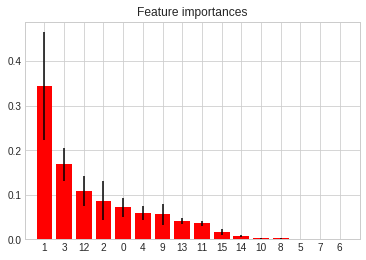

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_eval.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f],df_train.columns[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_eval.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_eval.shape[1]), indices)
plt.xlim([-1, X_eval.shape[1]])
plt.show()

In [ ]:
cut_off = 0.04
keep_columns = df_train.columns.to_list()
keep_dict = {}
keep_dict = {clm:True for clm in keep_columns}
for i in range(0,len(keep_columns)-1):
    # Loop over all columns to the right of the current one
    for j in range(i+1,len(keep_columns)):
        # If the importance of the feature calculated based on impurity is greater than or equal to 0.01
        if importances[indices[i]] <= cut_off:
            # If we haven't already told the keep_columns list to drop column j...
            if keep_dict[keep_columns[j]] == True:
                # Drop column j
                keep_dict[keep_columns[j]] = False
selected_columns = [clm for clm in keep_dict if keep_dict[clm] == True]
df_red= df_train[selected_columns].copy()

In [ ]:
X = df_red.values

In [ ]:
(unique, counts) = np.unique(y, return_counts=True)

In [ ]:
counts

array([ 13184,  86499, 237272])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Instantiate and train a TPOT auto-ML classifier
tpot = TPOTClassifier(generations=3, population_size=10, scoring='roc_auc_ovr_weighted', verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
# Evaluate the classifier on the test data
print(tpot.score(X_test, y_test))
tpot.export('tpot_classifier_pipeline.py')


Generation 1 - Current best internal CV score: 0.9531905124104517

Generation 2 - Current best internal CV score: 0.9531905124104517

Generation 3 - Current best internal CV score: 0.9531905124104517

Best pipeline: ExtraTreesClassifier(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=20, min_samples_split=10, n_estimators=100), bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=9, n_estimators=100)
0.9553090006914797


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

opt_model = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=20, min_samples_split=10, n_estimators=100, random_state=42)),
    ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=9, n_estimators=100,random_state=42))

opt_model.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestClassifier(bootstrap=True,
                                                                    ccp_alpha=0.0,
                                                                    class_weight=None,
                                                                    criterion='entropy',
                                                                    max_depth=None,
                                                                    max_features=0.6000000000000001,
                                                                    max_leaf_nodes=None,
                                                                    max_samples=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                 

In [ ]:
def eval_performance_roc_auc(model, y_test, prediction, cv=5):
	cm = confusion_matrix(y_test, prediction)
	acc = np.trace(cm)/len(y_test)
	roc_auc_scores = cross_val_score(model, X_test, y_test, scoring='roc_auc_ovr_weighted',cv=5)
	f1_scores = cross_val_score(model, X_test, y_test, scoring='roc_auc_ovr_weighted',cv=5)
	return cm, acc, roc_auc_scores, f1_scores

In [ ]:
prediction = opt_model.predict(X_test)

In [ ]:
cm_grid_search_nonlinear, accuracy_grid_search_nonlinear, roc_auc_scores_grid_search_nonlinear, f1_scores_grid_search_nonlinear  = eval_performance_roc_auc(opt_model, y_test, prediction, cv=5)
print(f"Accuracy = {accuracy_grid_search_nonlinear}")
print(f'Mean ROC AUC = {np.mean(roc_auc_scores_grid_search_nonlinear):.3f}')
print(f'Mean F1 Score = {np.mean(f1_scores_grid_search_nonlinear):.3f}')
print(cm_grid_search_nonlinear)

Accuracy = 0.906160040361273
Mean ROC AUC = 0.954
Mean F1 Score = 0.954
[[    0   890  3019]
 [    0 22253  3719]
 [    0  1858 69348]]


In [ ]:
# Use model = load('filename.joblib') to load this model from a the joblib file
dump(opt_model, "./tpot_opt_model02052021.joblib") 

['./tpot_opt_model02052021.joblib']

In [ ]:
# Saving training and testing dataset
df_red.to_pickle("./classifier_training_test_dataset02052021.pkl")

In [ ]:
param_grid = [
{'n_estimators': [5, 10, 15, 20, 25, 50], 'criterion': ['gini', 'entropy'], 
'min_samples_leaf': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
'bootstrap': [ True , False], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
]

non_linear_models = ExtraTreesClassifier(random_state=42, class_weight='balanced')
grid_search_non_linear = GridSearchCV(non_linear_models, param_grid, cv=5,n_jobs = -1, scoring='roc_auc_ovr_weighted', return_train_score=True, verbose=2)
grid_search_non_linear.fit(X_train, y_train)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 53.3min


KeyboardInterrupt: ignored

In [ ]:
print("Best Extra Tree Classifier hyperparameters found by grid search: ", grid_search_non_linear.best_params_)

In [ ]:
grid_search_non_linear.best_estimator_

In [ ]:
et_opt_model =ExtraTreesClassifier(bootstrap=True, 
                                            class_weight='balanced',
                                            criterion='entropy',
                                            max_features=7,
                                            min_samples_leaf=0.01,
                                            n_estimators=10, n_jobs=-1, random_state=42,
                                            verbose=0)
et_opt_model.fit(X_train, y_train)
prediction = et_opt_model.predict(X_test)
cm_grid_search_nonlinear, accuracy_grid_search_nonlinear, roc_auc_scores_grid_search_nonlinear, f1_scores_grid_search_nonlinear  = eval_performance_roc_auc(et_opt_model, y_test, prediction, cv=5)
print(f"Accuracy = {accuracy_grid_search_nonlinear}")
print(f'Mean ROC AUC = {np.mean(roc_auc_scores_grid_search_nonlinear):.3f}')
print(f'Mean F1 Score = {np.mean(f1_scores_grid_search_nonlinear):.3f}')
print(cm_grid_search_nonlinear)

In [ ]:
# Use model = load('filename.joblib') to load this model from a the joblib file
dump(opt_model, "./et_opt_model.joblib") 